# TRAN Simulation Example

In this example, we run a **Tran**ient simulation of an ideal buck (step-down) model.

This is the same code saved in the **30_TRAN.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df**.

In [6]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fname = "Buck_COT_TRAN"

run = pqs(fname)

run.qsch2cir()
run.cir2qraw()

run.setNline(4999)

df = run.LoadQRAW(["V(OUT)", "V(SS)", "V(Ics)", "V(COMP)"])

print(df)

              Time        V(OUT)         V(SS)    V(Ics)   V(COMP)  Step
0     0.000000e+00  0.000000e+00 -3.062458e-08  2.000000  0.000000     0
1     2.000400e-07  4.420626e-12 -3.062458e-08  2.000000  0.001052     0
2     4.000800e-07  8.841253e-12 -3.062458e-08  2.000000  0.002104     0
3     6.001200e-07  1.326188e-11 -3.062458e-08  2.000000  0.003157     0
4     8.001600e-07  1.768251e-11 -3.062458e-08  2.000000  0.004209     0
...            ...           ...           ...       ...       ...   ...
4995  9.991998e-04  3.305059e+00  1.001414e+00  2.364646  2.284293     0
4996  9.993999e-04  3.304872e+00  1.001414e+00  2.300948  2.285408     0
4997  9.995999e-04  3.304896e+00  1.001414e+00  2.364636  2.285252     0
4998  9.998000e-04  3.305017e+00  1.001414e+00  2.284050  2.284492     0
4999  1.000000e-03  3.304816e+00  1.001414e+00  2.338706  2.285701     0

[5000 rows x 6 columns]


## 2. Small Preparation for Plotting

In [7]:
#######
# Plot Default

mpl.rcParams.update([['font.sans-serif', ["Arial Rounded MT Bold", 'Arial Unicode MS', 'Arial', 'sans-serif']], ["mathtext.default", "rm"], ["legend.labelspacing", 0.1], ["legend.columnspacing", 0.2], ["legend.handletextpad", 0.3], ['axes.formatter.useoffset', False], ['xtick.minor.visible', True], ['ytick.minor.visible', True], ['grid.linewidth', 1],["savefig.dpi", 300], ["axes.unicode_minus", False]])

#######
# Plotting Pandas, AC

plt.close('all')
plt.style.use('ggplot')

## 3. Plotting

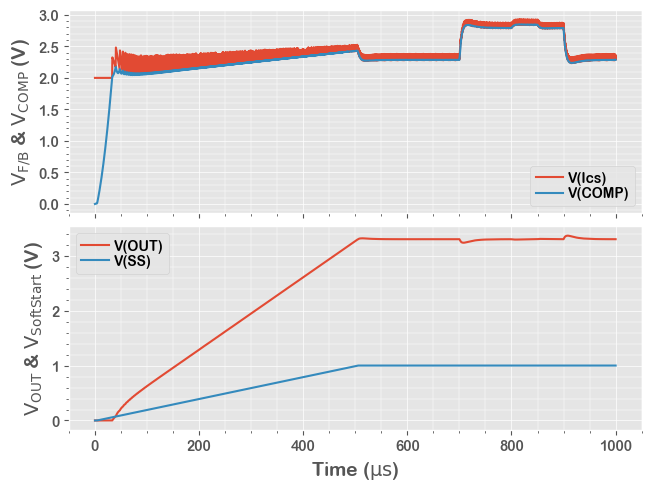

In [8]:
# Prepare a blank plotting area
fig2, (axT, axB) = plt.subplots(2,1,sharex=True,constrained_layout=True)

# Plot TRAN waveforms
df.plot(ax=axB, x="Time",  y="V(OUT)", label="V(OUT)")
df.plot(ax=axB, x="Time",  y="V(SS)", label="V(SS)")
df.plot(ax=axT, x="Time",  y="V(Ics)", label="V(Ics)")
df.plot(ax=axT, x="Time",  y="V(COMP)", label="V(COMP)")

# Axis setup = begin =
axB.set_xlabel(r'Time ($\mu s$)', fontsize=14)
axB.set_ylabel('$V_{OUT}$ & $V_{SoftStart}$ (V)', fontsize=14)
axT.set_ylabel('$V_{F/B}$ & $V_{COMP}$ (V)', fontsize=14)

axB.set_xticks([0, 0.2e-3, 0.4e-3, 0.6e-3, 0.8e-3, 1e-3],["0","200","400","600","800","1000"])

axB.minorticks_on()
axT.minorticks_on()

#axB.set_ylim(5.02,5.04)
#axT.set_ylim(5.07,5.09)

axB.grid(which='major', linewidth="0.5")
axB.grid(which="minor", linewidth="0.35")
axT.grid(which='major', linewidth="0.5")
axT.grid(which="minor", linewidth="0.35")
# Axis setup = end =

# Legend
axB.legend(ncol=1, loc="upper left",fancybox=True)
axT.legend(ncol=1, loc="lower right",fancybox=True)

# Save the PLot in PNG file
plt.savefig(fname + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')